### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataframe

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

### 3. First, look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 4. Rename the columns so they follow the PEP8 (snake case).

In [7]:
cols = [col_name.lower().replace(" ", "_") for col_name in customer_df.columns]
customer_df.columns = cols
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Fix the data types of columns when necessary

effective_to_date should be datetime and it's object

In [8]:
customer_df["effective_to_date"] = customer_df["effective_to_date"].astype("datetime64[ns]")

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 6. Plot a correlation matrix, and comment on what you observe.

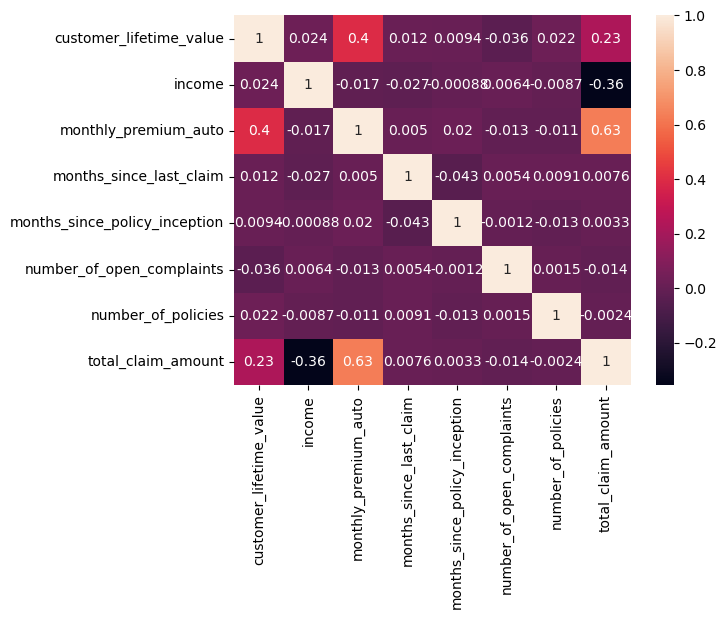

In [10]:
corr_matrix = customer_df.corr()
sns_plot = sns.heatmap(corr_matrix, annot=True)
plt.show()

There is not high correlation between features, with the exception of "total_claim_amount" and "monthly_premium_auto", where is quite high (0.63).

### 7. Plot every continuous variable. Comment what you can see in the plots.

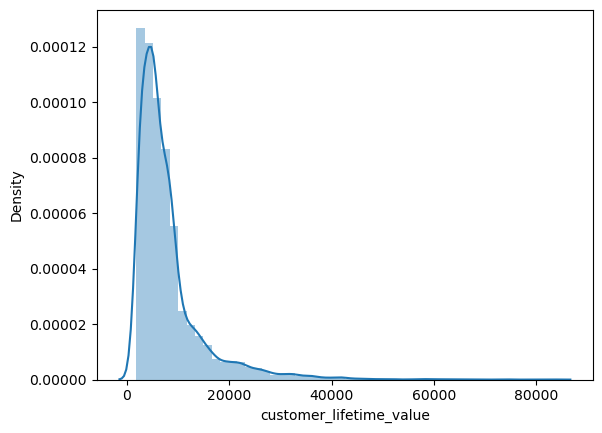

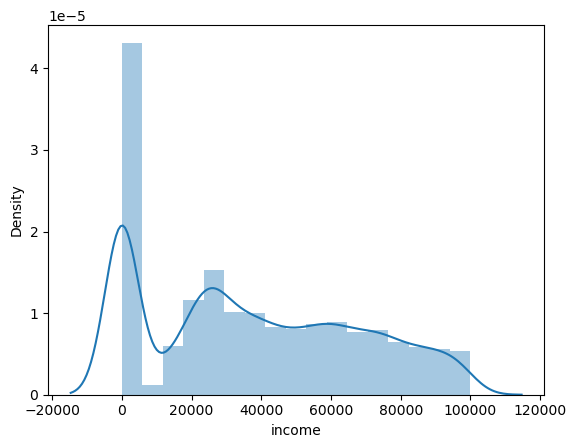

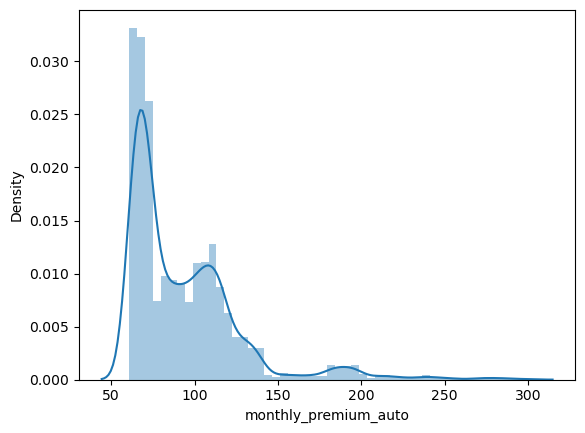

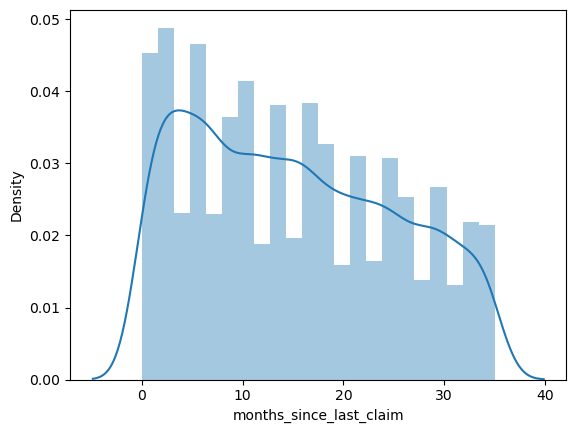

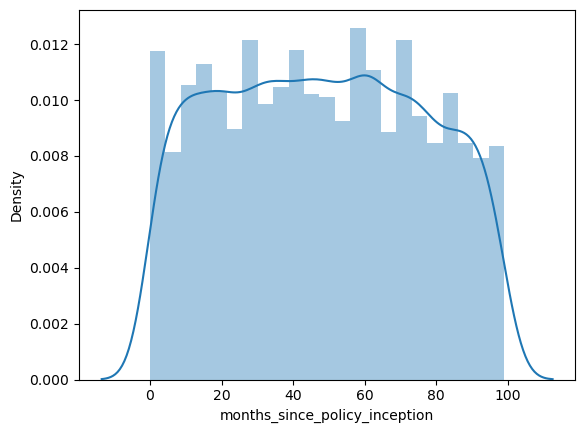

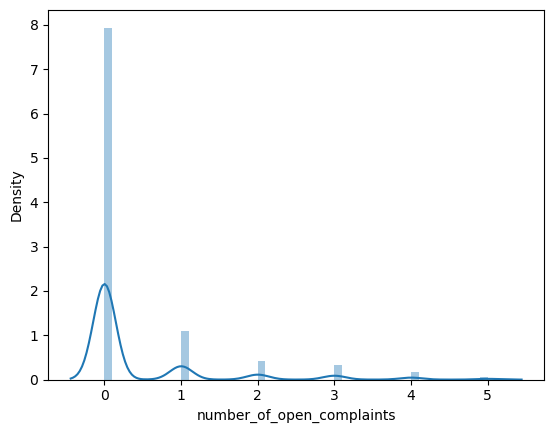

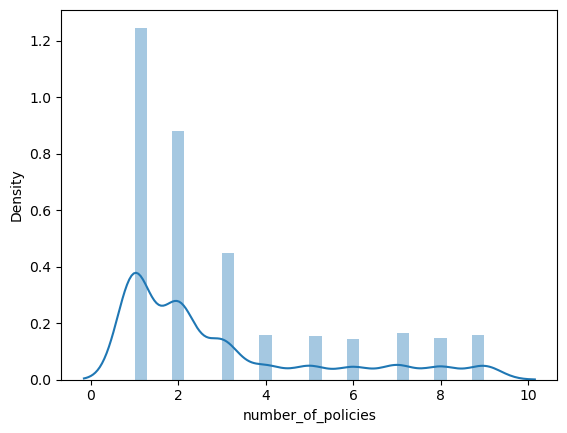

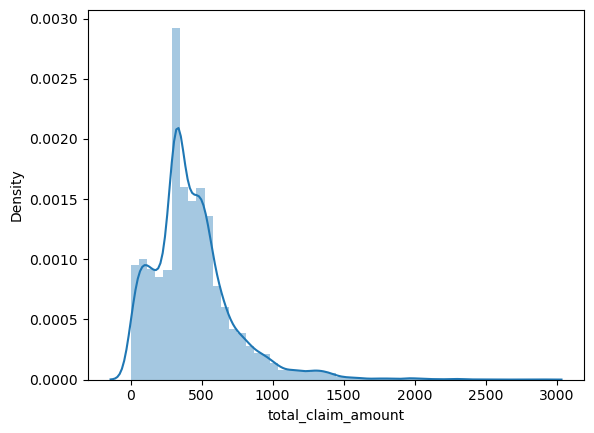

In [11]:
for column in customer_df.select_dtypes(np.number).columns:
    sns.distplot(customer_df[column])
    plt.show()

- 'customer_lifetime_value': very skewed to the left, although the maximum reaches more than 80,000 (outliers)
- 'income': huge number of zeros, this looks like there is missing data
- 'monthly_premium_auto': the distribution is relatively similar to customer_lifetime_value
- 'months_since_last_claim': this distribution looks more "normal" but it's still skewed to the left
- 'months_since_policy_inception': quite normal distribution
- 'number_of_open_complaints': mostly zeros, but this has sense 
- 'number_of_policies': mostly 1-2, up to 9
- 'total_claim_amount': similar distribution to customer_lifetime_value and monthly_premium_auto

### 8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). 
Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [12]:
plotting_categoricals = customer_df.select_dtypes(object)

# drop the customer id because it has no sense to plot it (one value per row = more than 9000 unique values)
plotting_categoricals = plotting_categoricals.drop("customer", axis = 1)

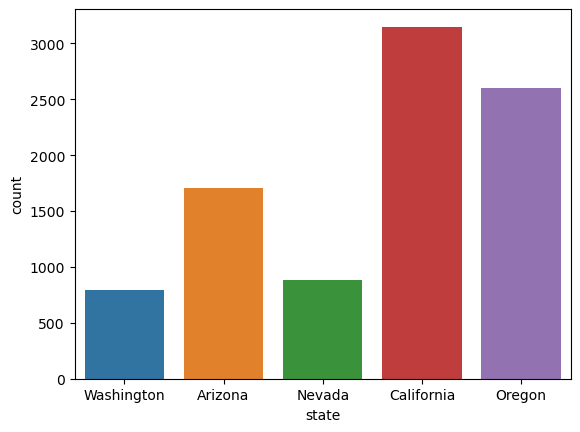

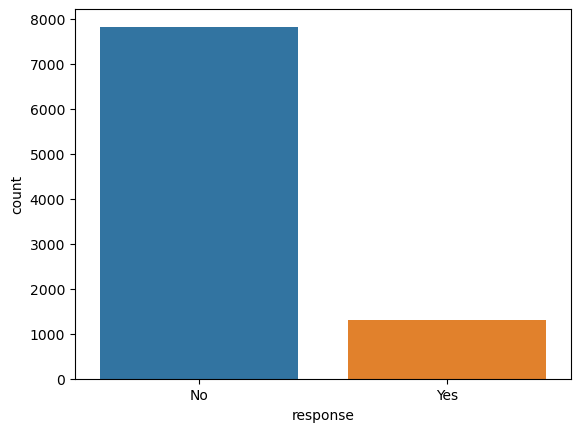

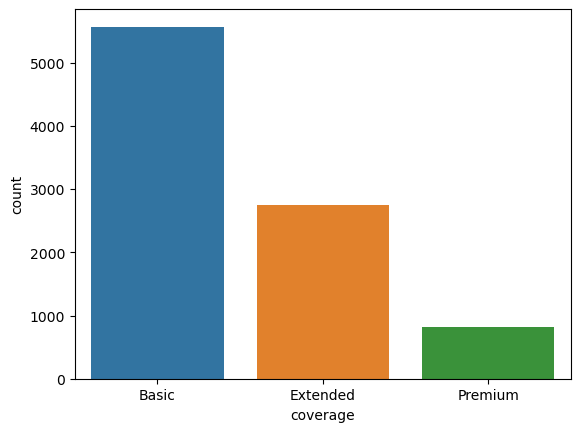

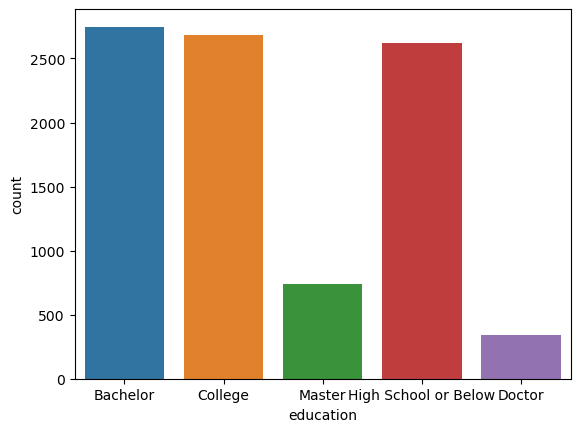

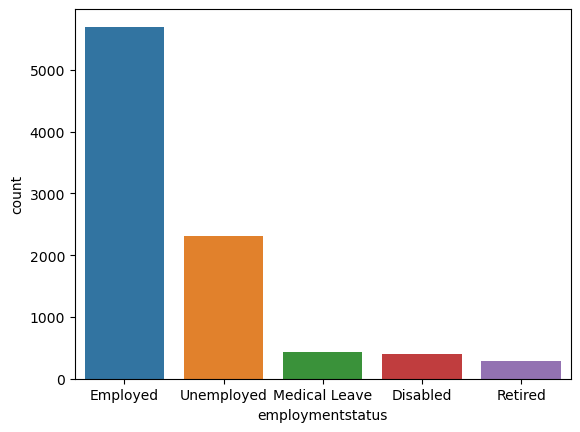

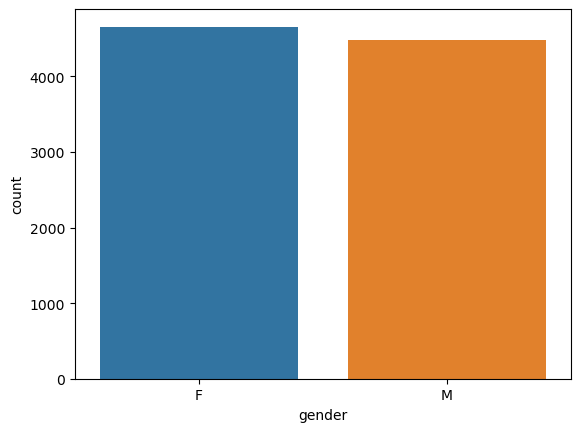

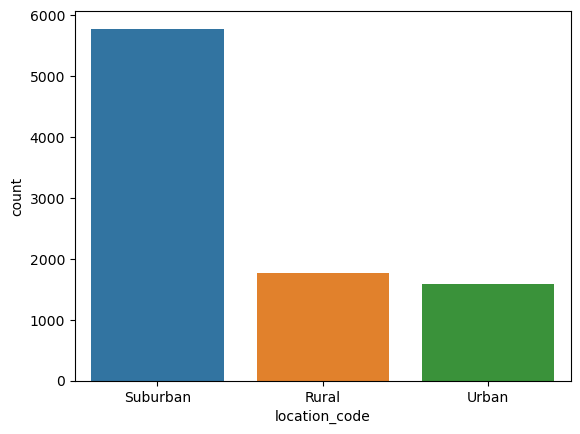

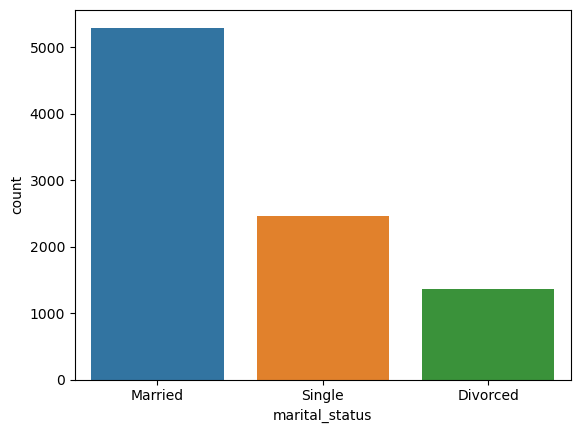

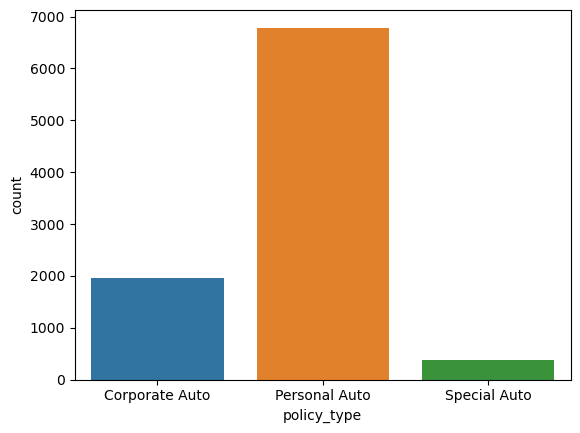

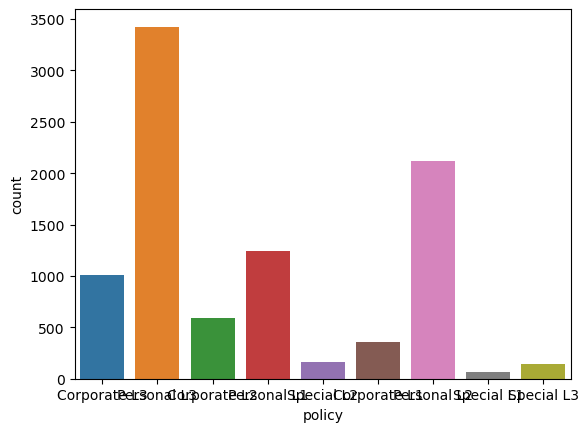

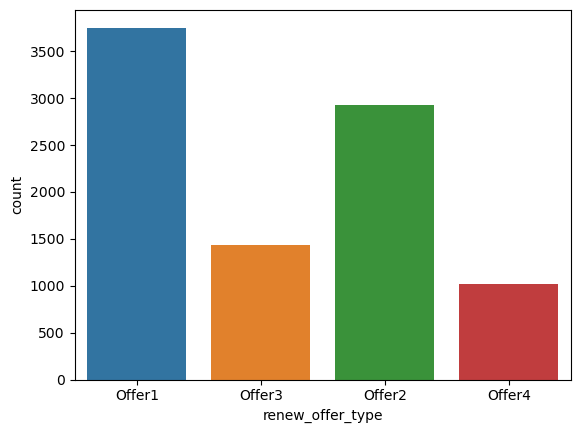

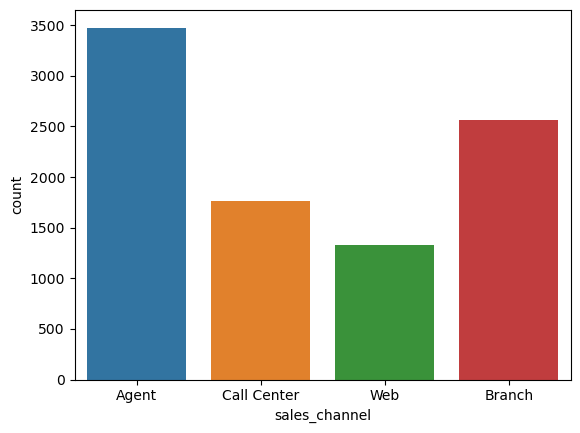

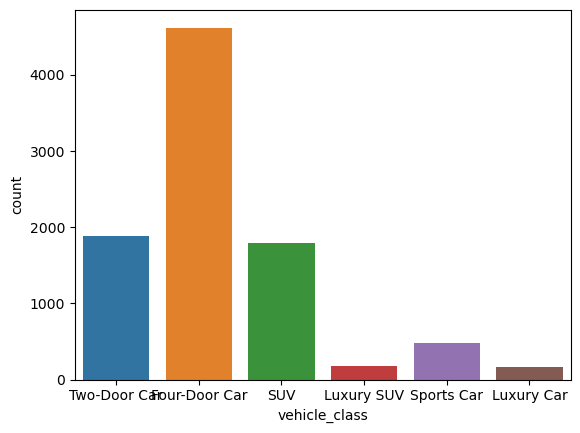

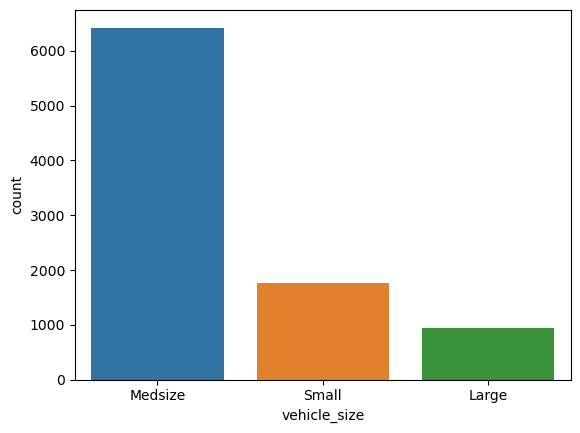

In [13]:
for column in plotting_categoricals.columns:
    sns.countplot(customer_df[column])
    plt.show()

In [14]:
customer_df.select_dtypes(object).columns


Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

- 'state': 5 categories, most importants are California and Oregon
- 'response': boolean (yes/no). Mainly "No"
- 'coverage': 3 categories, ordinal
- 'education': 5 categories, ordinal
- 'employmentstatus': 5 categories, mainly employed and unemployed. Maybe group the rest in "other"
- 'gender': 2 categories, very equal
- 'location_code': 3 categories, high proportion of suburban
- 'marital_status': 3 categories, high proportion of married
- 'policy_type': 3 categories, mainly personal auto
- 'policy': 9 categories, do value counts for this column to see better
- 'renew_offer_type': 4 categories, ordinal?
- 'sales_channel': 4 categories
- 'vehicle_class': 6 categories, group luxury and sports car?
- 'vehicle_size': 3 categories, ordinal

In [15]:
customer_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Policy could be grouped in 3 categories (personal, corporate and special)

### 9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

[(-0.5, 10.0)]

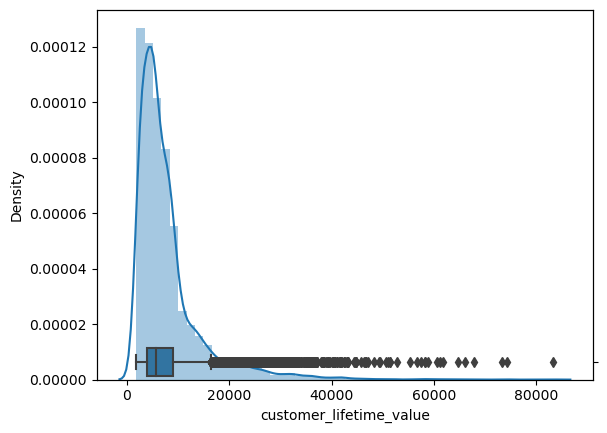

In [16]:
ax = sns.distplot(customer_df["customer_lifetime_value"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df['customer_lifetime_value'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

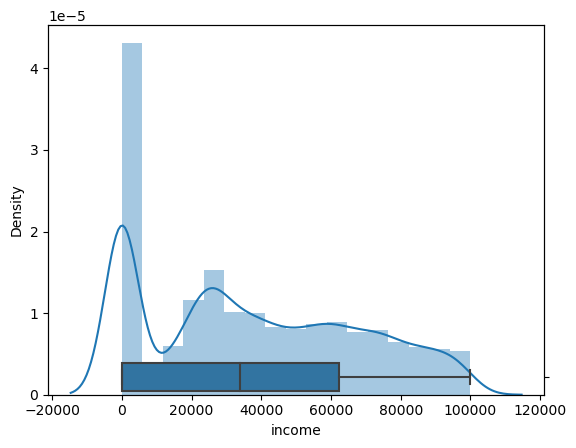

In [17]:
ax = sns.distplot(customer_df["income"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["income"], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

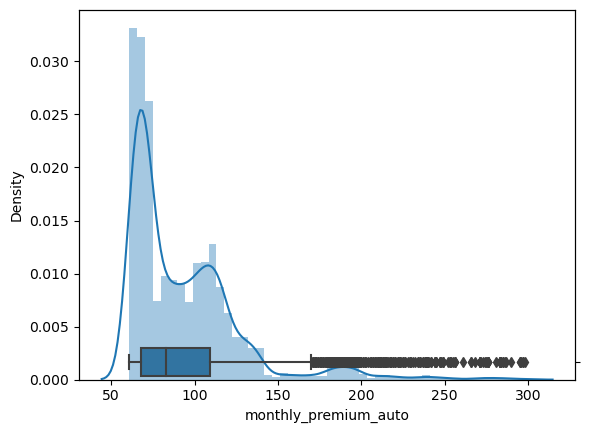

In [18]:
ax = sns.distplot(customer_df["monthly_premium_auto"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["monthly_premium_auto"], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

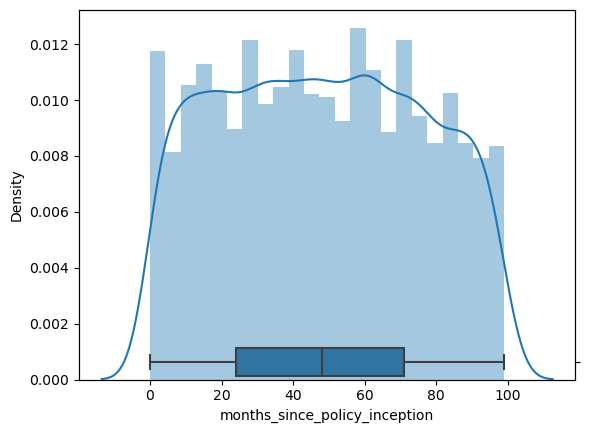

In [19]:
ax = sns.distplot(customer_df["months_since_policy_inception"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["months_since_policy_inception"], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

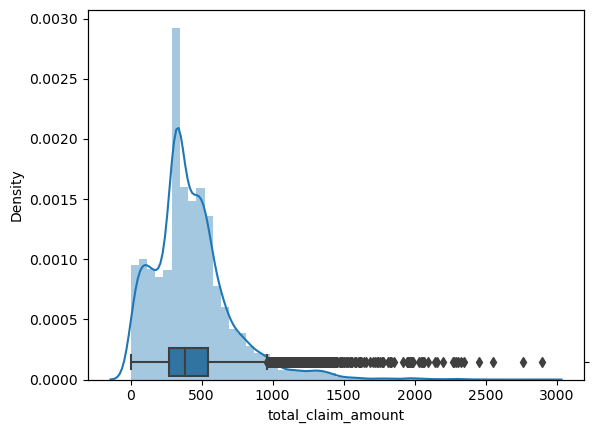

In [20]:
ax = sns.distplot(customer_df["total_claim_amount"])
ax2 = ax.twinx()
sns.boxplot(x=customer_df["total_claim_amount"], ax=ax2)
ax2.set(ylim=(-.5, 10))

There are outliers in customer_lifetime_value, monthly_premium_auto, total_claim_amount. <br>
I would consider removing them a part of them (not all of them because it is too much data), but first I need to know which is the target and also decide the features that will be used as the independent variables. Also it is best to remove the outliers after applying transformations.

### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [21]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There are no NaN values. However, let's have a look at income.

In [22]:
customer_df["income"].value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [23]:
# percentage of zeros in income = 25%

2317 / 9134 * 100

25.366761550251805

Percentage of zeros in income = 25% <br>
Apply interpolation to replace these 0 with another values (however if in the next steps we see that this variable is not relevant, maybe drop the column?).

In [24]:
# replace zeros with NaN to apply interpolations
customer_df["income"] = customer_df["income"].apply(lambda x: np.nan if x == 0 else x)
customer_df["income"].isna().sum()

2317

<AxesSubplot:xlabel='income', ylabel='Density'>

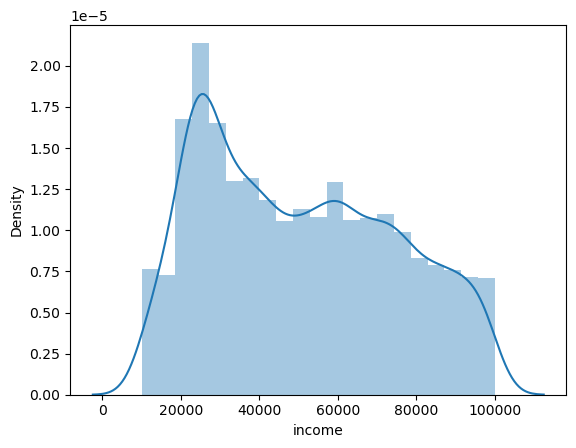

In [25]:
sns.distplot(customer_df["income"])

<AxesSubplot:xlabel='income', ylabel='Density'>

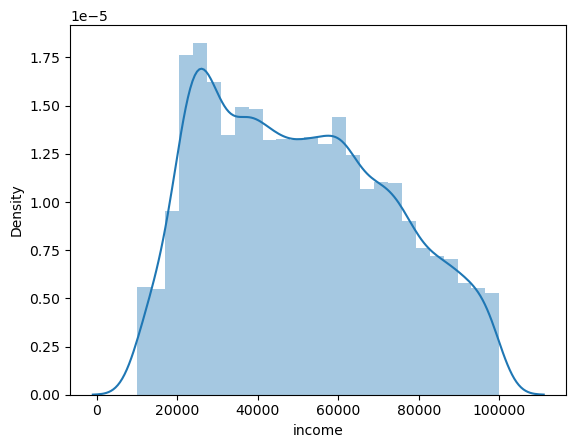

In [26]:
# linear interpolation
new_income_data_linear = customer_df["income"].interpolate(method='linear')
sns.distplot(new_income_data_linear)

<AxesSubplot:xlabel='income', ylabel='Density'>

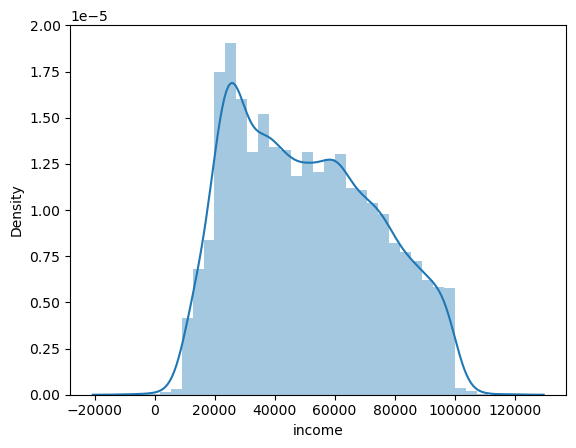

In [27]:
# Akima's interpolation

new_income_data_akima = customer_df["income"].interpolate(method='akima')
sns.distplot(new_income_data_akima)

<AxesSubplot:xlabel='income', ylabel='Density'>

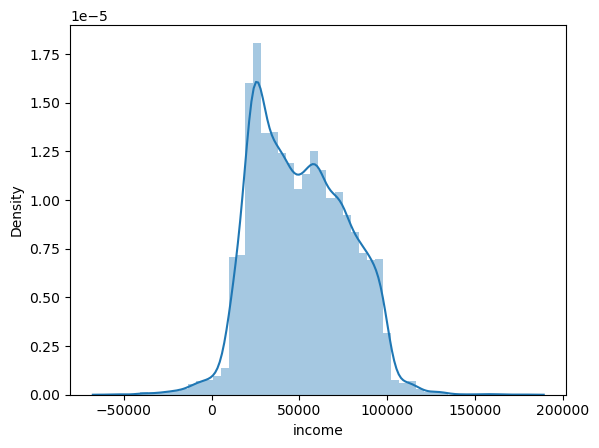

In [28]:
# polynomial order 3

new_income_data_poly = customer_df["income"].interpolate(method='polynomial', order=3)
sns.distplot(new_income_data_poly)

Which one to use? I would need more info to choose one or another... but looks like Akima and polynomal add more values in both ends of the distribution. If I were to use one of these two, I would have to do something with the negative incomes, also more outliers... <br>
Therefore I would use the linear interpolation.

In [29]:
customer_df["income"] = new_income_data_linear

<AxesSubplot:xlabel='income', ylabel='Density'>

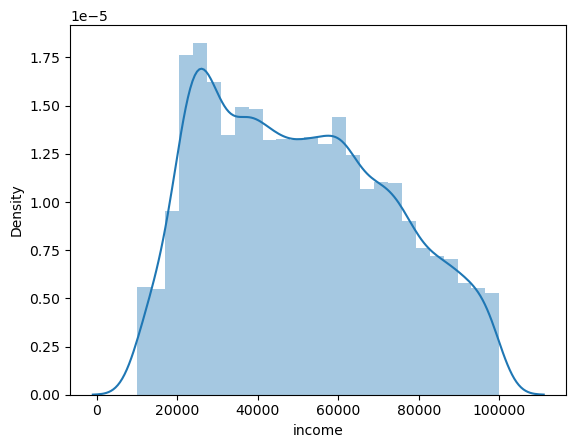

In [30]:
sns.distplot(customer_df["income"])

In [31]:
customer_df["income"].isna().sum()

0